In [ ]:
# this is the code that trains the model to detect the melanoma, plus some sample detections at the bottom on th page

In [9]:
!pip install ultralytics

In [10]:
!pip install torch

In [11]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
import torch
display.clear_output()
print(torch.backends.mps.is_available())
!yolo mode=checks

True
Traceback (most recent call last):
  File "/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/venv/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/venv/lib/python3.12/site-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/venv/lib/python3.12/site-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'track', 'train', 'predict', 'val', 'benchmark'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'classify', 'detect', 'segment', 'obb'}
                MODE (required) is one of {'export', 'track', '

In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ejiFJub6YTb4WTm7oeS3")
project = rf.workspace("skin-cancer-yp3qt").project("skin-cancer-svnul")
version = project.version(4)
dataset = version.download("yolov8")


  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl.metadata (722 bytes)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 851.1 kB/s eta 0:00:00a 0:00:01
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-macosx_11_0_arm64.whl (33.1 MB)
Using cached p


Extracting Dataset Version Zip to skin-cancer-4 in yolov8:: 100%|█| 10452/10452 [00:00<00:00, 15518.65it/


In [12]:
!PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0

In [13]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [20]:
!yolo task=detect mode=train model=yolov8n.pt data="/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/skin-cancer-4/data.yaml" epochs=55 imgsz=250,250 device='mps'

Ultralytics YOLOv8.2.4 🚀 Python-3.12.3 torch-2.3.0 MPS (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/skin-cancer-4/data.yaml, epochs=55, time=None, patience=100, batch=16, imgsz=(250, 250), save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [113]:
def displayPrediction(model_path, image_path):
    model = YOLO("/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/" + model_path)

    # Run batched inference on a list of images
    results = model.predict(["/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/skin-cancer-4/train/images/" + image_path], conf=0.53)  # return a list of Results objects
    
    # Process results list
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        result.save(filename=image_path + 'result.jpg' )  # save to disk
        img = Image.open(image_path + 'result.jpg')
        display(img)

In [114]:
from PIL import Image
from IPython.display import display


0: 640x640 1 cancer, 527.1ms
Speed: 1.3ms preprocess, 527.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


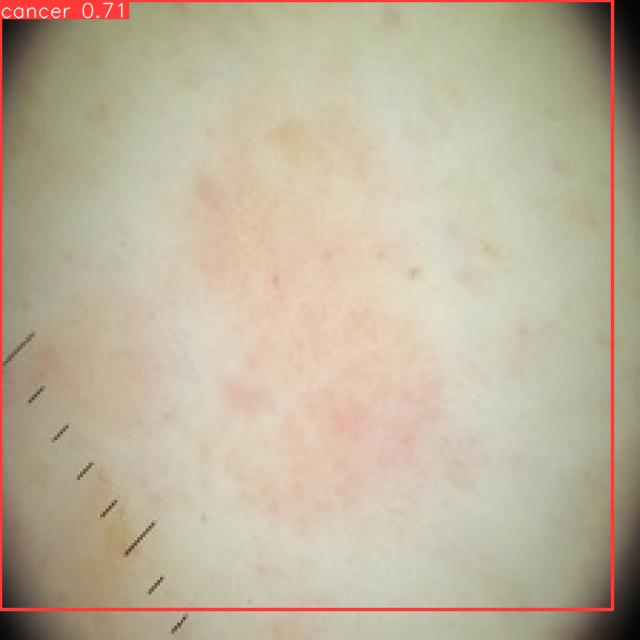

In [115]:
displayPrediction("best(3).pt", "malignant-57-_jpg.rf.2b785d798ac7dee2194d8355df1cbdd4.jpg")


0: 640x640 (no detections), 455.4ms
Speed: 0.7ms preprocess, 455.4ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


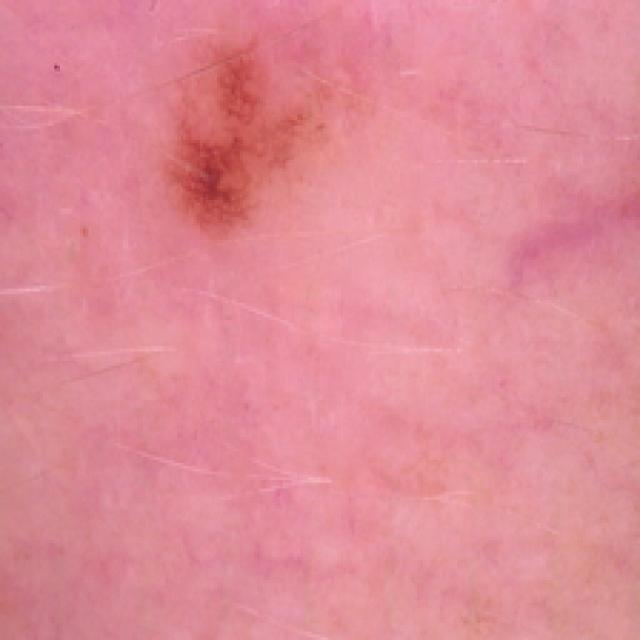

In [105]:
displayPrediction("best(3).pt", "benign-430-_jpg.rf.b19c0a8c97569d5b6f7fe9a690f2c113.jpg")


0: 640x640 1 cancer, 482.0ms
Speed: 0.7ms preprocess, 482.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


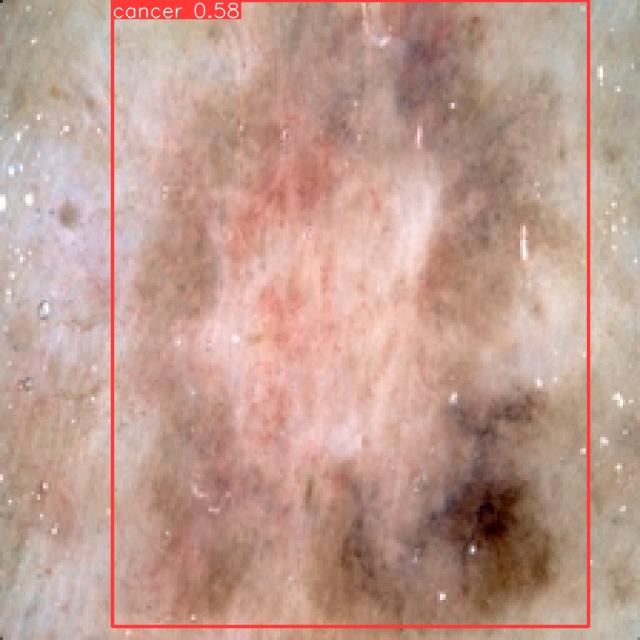

In [106]:
displayPrediction("best(3).pt", "malignant-287-_jpg.rf.25664b0449987939d0e97ec59b07347d.jpg")


0: 640x640 1 cancer, 474.8ms
Speed: 0.9ms preprocess, 474.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


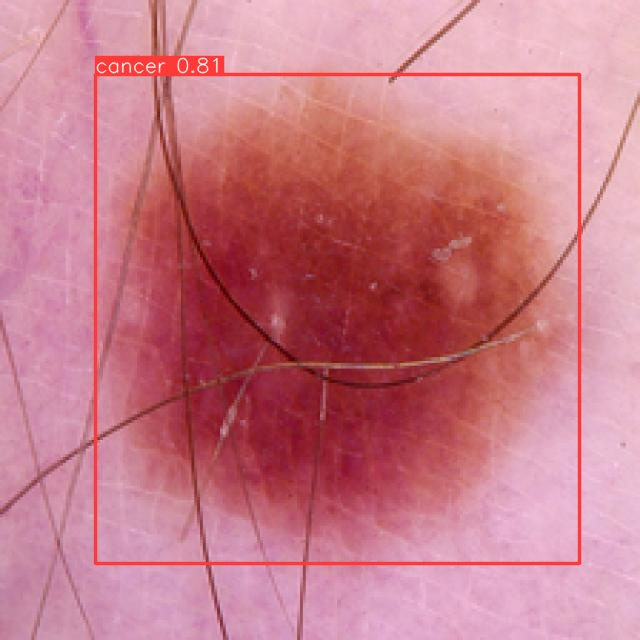

In [116]:
displayPrediction("best(3).pt", "benign-477-_jpg.rf.245f9229cb6afd8a9e422653fd369025.jpg")


0: 640x640 1 cancer, 468.6ms
Speed: 0.8ms preprocess, 468.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


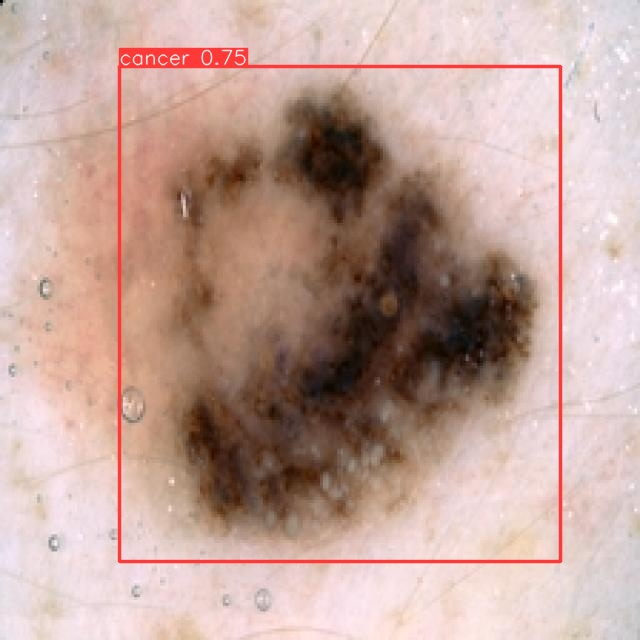

In [108]:
displayPrediction("best(3).pt", "malignant-192-_jpg.rf.c2ab74cf8820698e43ef4e21112ac8ab.jpg")


0: 640x640 (no detections), 458.3ms
Speed: 0.6ms preprocess, 458.3ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


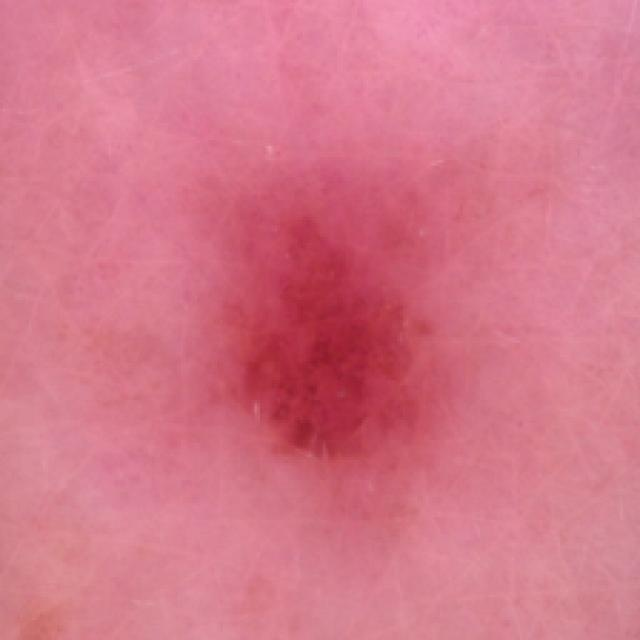

In [109]:
displayPrediction("best(3).pt", "benign-370-_jpg.rf.5a5301902a4c56fbbeff4e037cae3481.jpg")


0: 640x640 1 cancer, 468.3ms
Speed: 1.1ms preprocess, 468.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


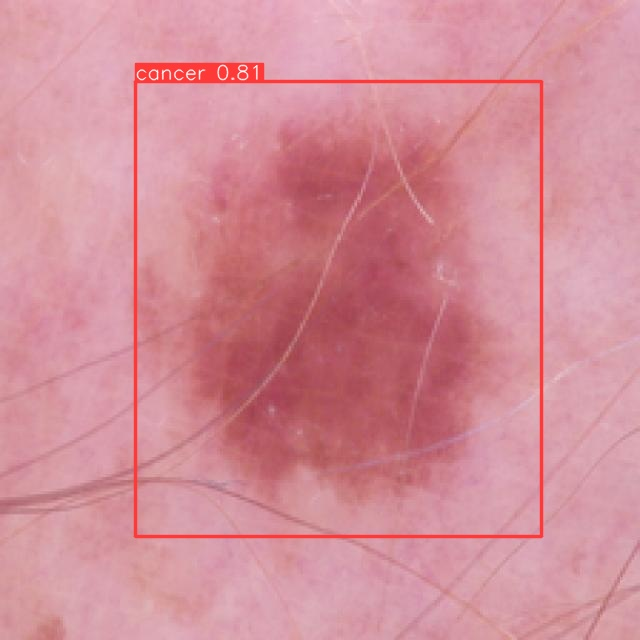

In [110]:
displayPrediction("best(3).pt", "benign-165-_jpg.rf.a482d9219712b5d9ededc45d964f7488.jpg")


0: 640x640 1 cancer, 463.1ms
Speed: 1.0ms preprocess, 463.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


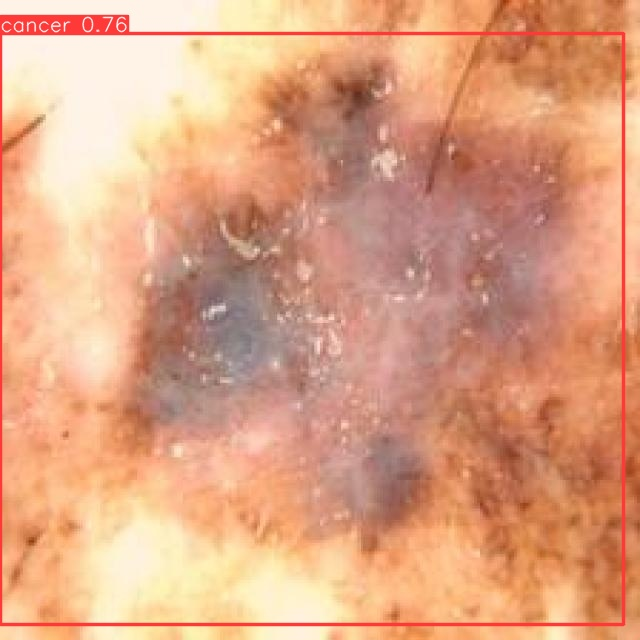

In [112]:
displayPrediction("best(3).pt", "malignant-19-_jpg.rf.158415a865fe71928f05ad06ea8a6084.jpg")


0: 640x640 (no detections), 473.4ms
Speed: 1.0ms preprocess, 473.4ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


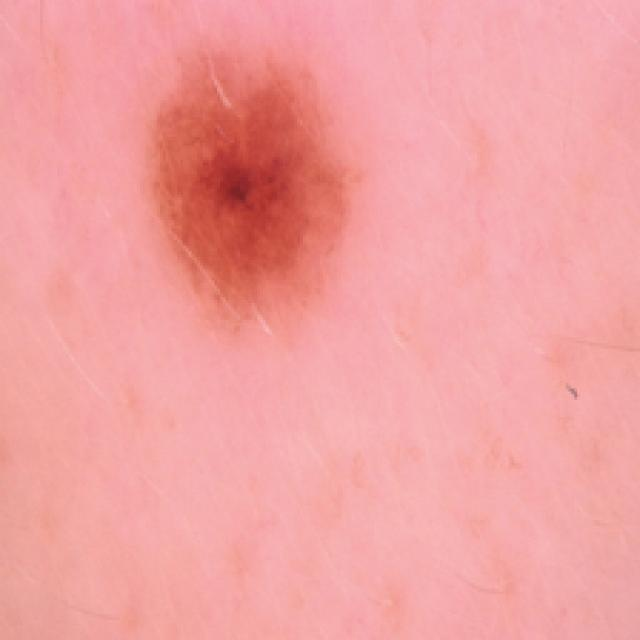

In [117]:
displayPrediction("best(3).pt", "benign-476-_jpg.rf.cbcdeb16a1a33397783cd14b1b5e78a7.jpg")

In [119]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp

In [120]:
!pip install tflite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 2.1 MB/s eta 0:00:00 0:00:01


In [124]:
!yolo export model="/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/best(3).pt" format=tflite

Ultralytics YOLOv8.2.4 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M3 Pro)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from '/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/best(3).pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (390.7 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 1.9s, saved as '/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/best(3).onnx' (260.1 MB)

Export complete (4.7s)
Results saved to /Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models
Predict:         yolo predict task=detect model=/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/best(3).onnx imgsz=640  
Validate:        yolo val task=detect model=/Users/gustavoramos/git/botbusters/TrainingMelanomaDetector/models/best(3).onnx imgsz=640 data=/content/skin-cancer-4/data.yaml  
Visualize:       https://netron.app
💡 Learn more at http

In [123]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 26.4 MB/s eta 0:00:0000:0100:01
